<a href="https://colab.research.google.com/github/RaghuVDs/707-lecture-master/blob/main/week2_exercise_titanicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [26]:
file_path = '/content/drive/My Drive/SyracuseUniversity/AML/DataFile/titanic.csv'
df = pd.read_csv(file_path)
df.head(20)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
5,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,1
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,1
7,1,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,0
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,1
9,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,0


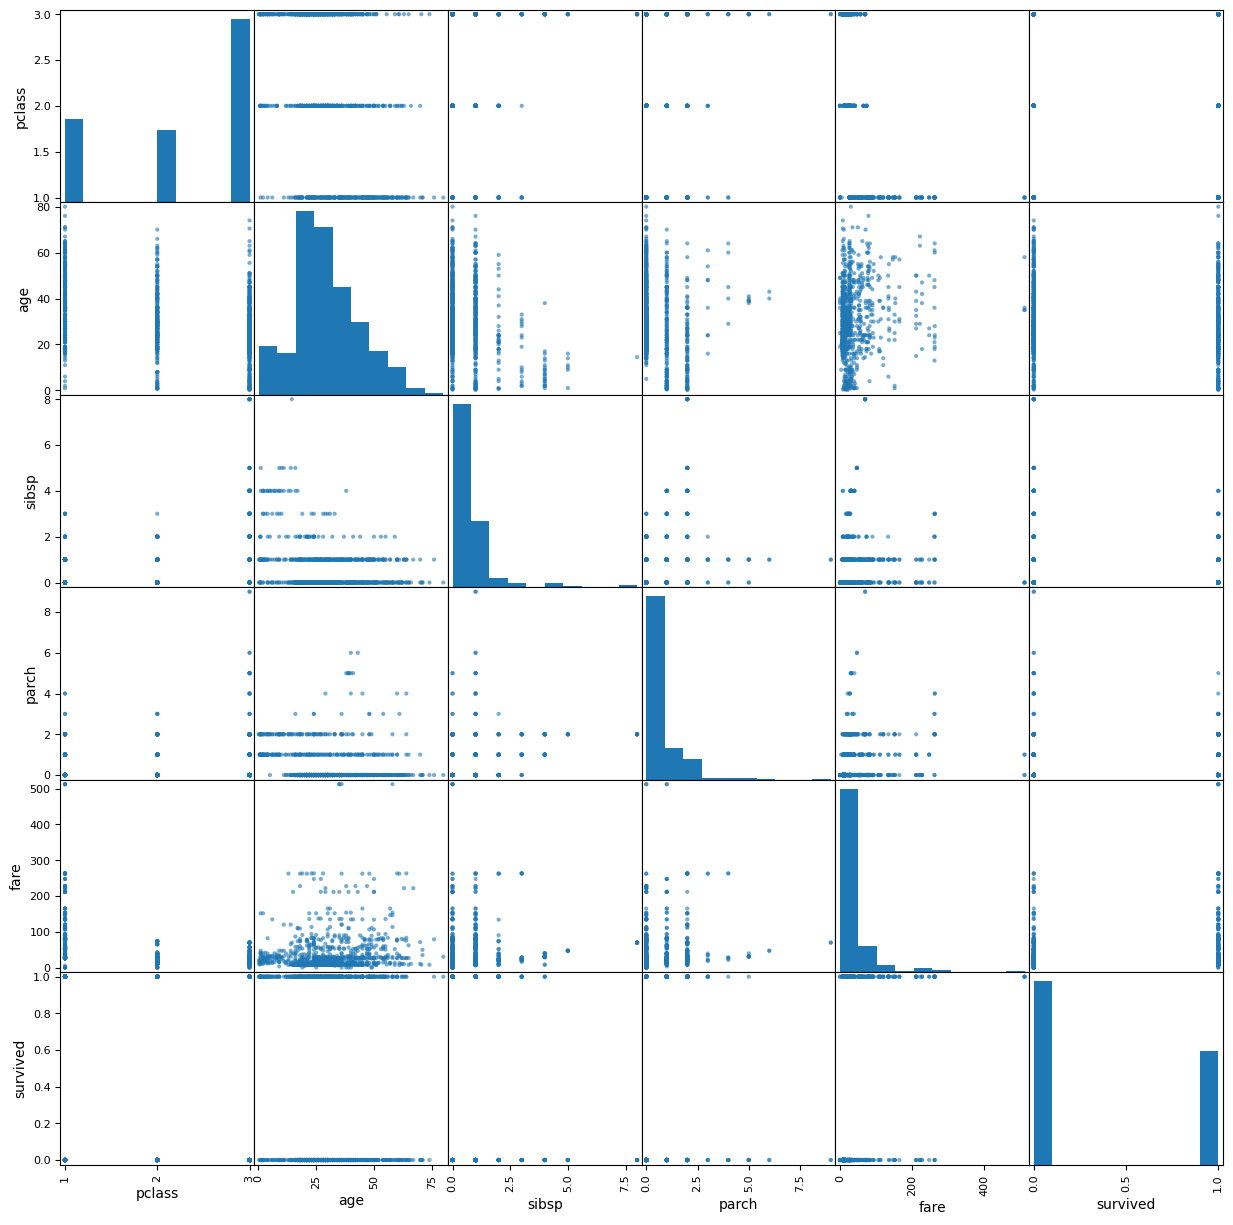

In [16]:
scatter_matrix(df, alpha=0.6, figsize=(15, 15))
plt.show()

In [17]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

In [23]:
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


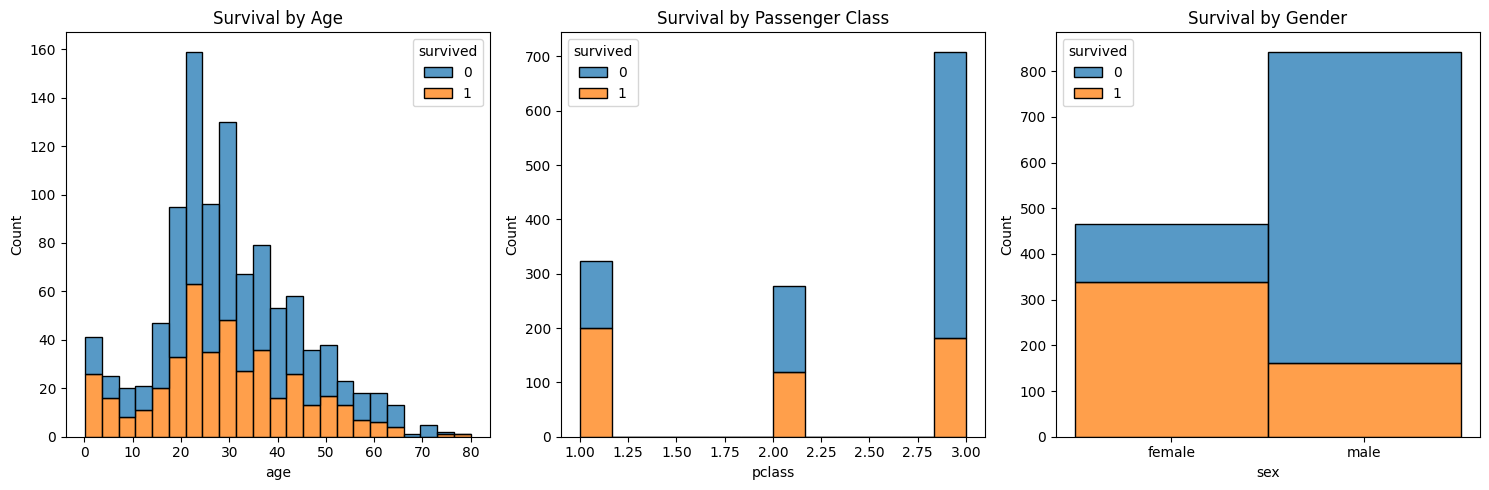

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histogram for Survival by Age
sns.histplot(data=df, x='age', hue='survived', multiple='stack', ax=axes[0])
axes[0].set_title('Survival by Age')

# Histogram for Survival by Pclass
sns.histplot(data=df, x='pclass', hue='survived', multiple='stack', ax=axes[1])
axes[1].set_title('Survival by Passenger Class')

# Histogram for Survival by Gender
sns.histplot(data=df, x='sex', hue='survived', multiple='stack', ax=axes[2])
axes[2].set_title('Survival by Gender')

# Display the plot
plt.tight_layout()
plt.show()

In [25]:
na_counts = df.isna().sum()
print(na_counts)

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64


In [31]:
# Mean Imputation for 'age'
age_mean = df['age'].mean()
df['age'].fillna(age_mean, inplace=True)

# Mode Imputation for 'cabin'
cabin_mode = df['cabin'].mode()[0]
df['cabin'].fillna(cabin_mode, inplace=True)

# Mean Imputation for 'fare'
fare_mean = df['fare'].mean()
df['fare'].fillna(age_mean, inplace=True)

# Mode Imputation for 'embark'
embark_mode = df['embarked'].mode()[0]
df['embarked'].fillna(cabin_mode, inplace=True)

In [32]:
na_counts = df.isna().sum()
print(na_counts)

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
survived    0
dtype: int64


In [33]:
# one hot encoding

from sklearn.preprocessing import OneHotEncoder


columns_to_encode = ['pclass', 'sex', 'embarked']

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Applying OneHotEncoder and creating a new DataFrame with the encoded columns
one_hot_encoded = one_hot_encoder.fit_transform(df[columns_to_encode]).toarray()
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

# Ensuring to reset the index to avoid concatenation issues
df.reset_index(drop=True, inplace=True)
one_hot_encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df, one_hot_encoded_df], axis=1)

In [36]:
# Dropping the original columns
df_encoded.drop(columns_to_encode, axis=1, inplace=True)

In [38]:
df_encoded.head()

,name,age,sibsp,parch,ticket,fare,cabin,survived,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_C23 C25 C27,embarked_Q,embarked_S
0,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
